In [ ]:
## Used: https://www.tensorflow.org/tutorials/keras/classification


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape


(10000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

###Prepare Data


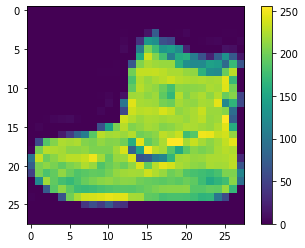

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

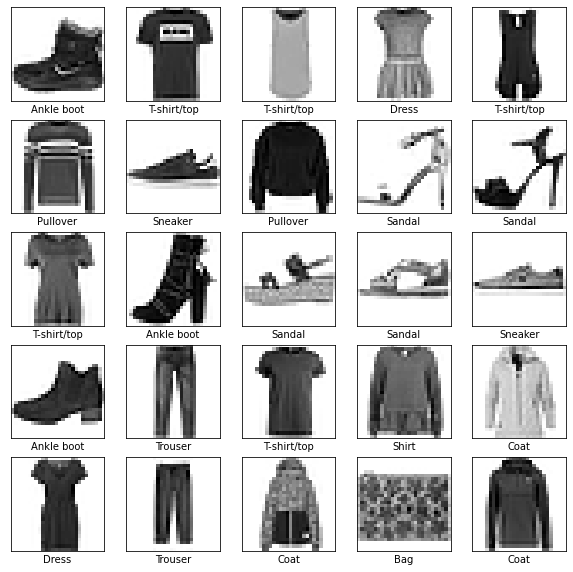

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###Build Model


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###Train Model


In [55]:
model.fit(train_images, train_labels, epochs=70)


Epoch 1/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4148 - accuracy: 0.8532
Epoch 2/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4092 - accuracy: 0.8555
Epoch 3/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4031 - accuracy: 0.8580
Epoch 4/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3979 - accuracy: 0.8596
Epoch 5/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3927 - accuracy: 0.8608
Epoch 6/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3880 - accuracy: 0.8625
Epoch 7/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3840 - accuracy: 0.8642
Epoch 8/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8648
Epoch 9/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8668
Epoch 10/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.372

In [56]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3437 - accuracy: 0.8783 - 349ms/epoch - 1ms/step

Test accuracy: 0.8783000111579895


In [57]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([2.8503064e-09, 1.8714626e-10, 4.1711132e-07, 2.7796300e-06,
       5.7833986e-06, 4.0483147e-02, 1.7933929e-06, 3.9154142e-02,
       4.4215753e-04, 9.1990972e-01], dtype=float32)

In [58]:
np.argmax(predictions[0])


9

In [59]:
test_labels[0]


9

In [60]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

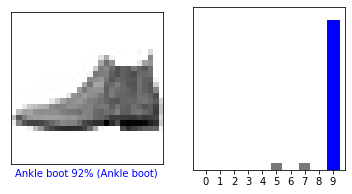

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

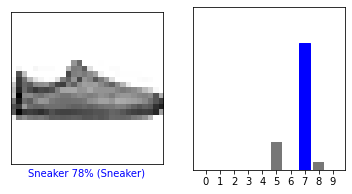

In [62]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

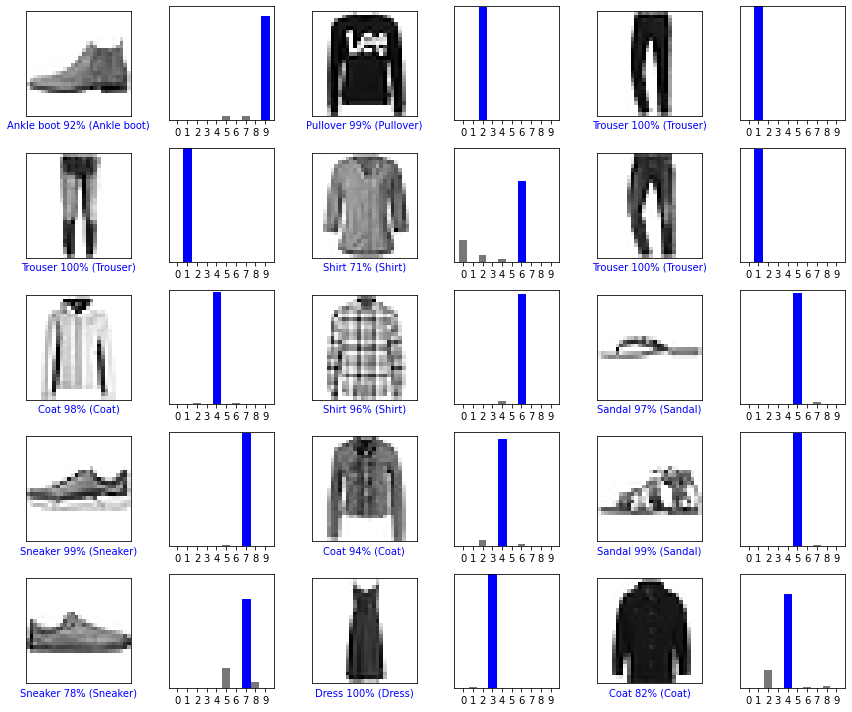

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

##Use the trained model

In [64]:
img = test_images[1]

print(img.shape)

(28, 28)


In [65]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [66]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.81267624e-05 8.84611606e-10 9.94527996e-01 1.27510555e-06
  2.01681280e-03 3.54650445e-16 3.33750946e-03 1.23628814e-25
  2.82144811e-05 1.16914055e-20]]


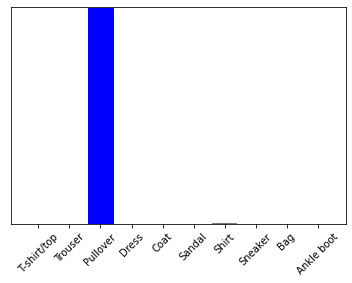

In [67]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [68]:
np.argmax(predictions_single[0])


2

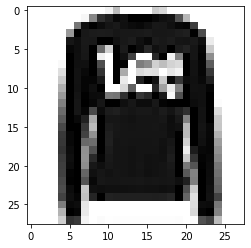

In [69]:
plt.imshow(test_images[1], cmap=plt.cm.binary)

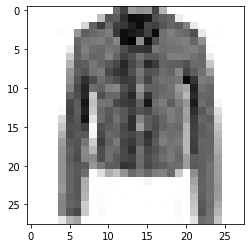

In [70]:
plt.imshow(test_images[10], cmap=plt.cm.binary)

In [71]:
img2 = (np.expand_dims(test_images[10],0))
predictions_single2 = probability_model.predict(img2)

print(predictions_single2)

[[2.65833260e-05 1.06004954e-04 5.03945537e-02 1.89172963e-04
  9.35690343e-01 2.18347302e-11 1.35674551e-02 1.08049847e-17
  2.60128818e-05 2.68299109e-13]]


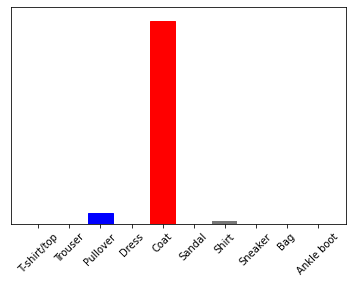

In [72]:
plot_value_array(1, predictions_single2[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

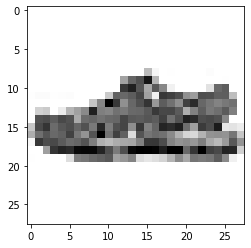

In [73]:
plt.imshow(test_images[21], cmap=plt.cm.binary)

In [74]:
img3 = (np.expand_dims(test_images[21],0))
predictions_single3 = probability_model.predict(img3)

print(predictions_single3)

[[1.0645797e-07 7.8263966e-08 5.2607170e-06 3.3812196e-04 1.7433593e-05
  7.5862092e-01 8.7659384e-07 2.3986492e-01 3.1997255e-04 8.3222467e-04]]


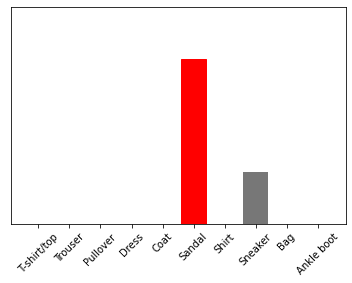

In [75]:
plot_value_array(1, predictions_single3[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()